# Installing and importing Libraries

In [1]:
! pip install 'h5py==2.10.0' --force-reinstall
!pip install -U keras==2.1.0
!pip install -U scikit-image==0.16.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
!pip install -U keras==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd
import tensorflow
import skimage
from skimage.io import imread, imshow, imread_collection, concatenate_images
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import imutils
from sklearn.metrics import f1_score
import random
!pip install texttable
from texttable import Texttable
import glob
from skimage import io
import scipy.io as sio
from skimage import data, io, util
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import shutil
import glob
from skimage import io
import scipy 
from skimage import data, io, util
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import resize
import cv2
import os
import shutil
from google.colab.patches import cv2_imshow
import pycocotools.mask as mask_util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cloning MASK RCNN github repository

In [14]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [7]:
os.chdir('/content/Mask_RCNN/')
!ls
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
os.chdir('..')
!ls

assets	LICENSE  MANIFEST.in	    mrcnn      requirements.txt  setup.cfg
images	logs	 mask_rcnn_coco.h5  README.md  samples		 setup.py


Using TensorFlow backend.


# Datastet Preparation

In [17]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
#unziping datasset
!unzip /content/drive/MyDrive/cpm17.zip -d /content/

Archive:  /content/drive/MyDrive/cpm17.zip
  inflating: /content/cpm17/train/Labels/image_01.mat  
  inflating: /content/cpm17/train/Labels/image_12.mat  
  inflating: /content/cpm17/train/Labels/image_25.mat  
  inflating: /content/cpm17/train/Labels/image_23.mat  
  inflating: /content/cpm17/train/Labels/image_07.mat  
  inflating: /content/cpm17/train/Labels/image_05.mat  
  inflating: /content/cpm17/train/Labels/image_06.mat  
  inflating: /content/cpm17/train/Labels/image_08.mat  
  inflating: /content/cpm17/train/Labels/image_09.mat  
  inflating: /content/cpm17/train/Labels/image_19.mat  
  inflating: /content/cpm17/train/Labels/image_20.mat  
  inflating: /content/cpm17/train/Labels/image_15.mat  
  inflating: /content/cpm17/train/Labels/image_22.mat  
  inflating: /content/cpm17/train/Labels/image_16.mat  
  inflating: /content/cpm17/train/Images/image_03.png  
  inflating: /content/cpm17/train/Labels/image_10.mat  
  inflating: /content/cpm17/train/Images/image_17.png  
  inf

In [10]:
# # Data Path
TRAIN_PATH = '/content/cpm17/train/Images/'
TEST_PATH ='/content/cpm17/test/Images/'

# # Get train and test IDs
train_ids = next(os.walk("/content/cpm17/train/Images"))[2]
test_ids = next(os.walk(TEST_PATH))[2]
print(train_ids,test_ids)

['image_29.png', 'image_16_1.png', 'image_01.png', 'image_25_0.png', 'image_12_1.png', 'image_22_0_1.png', 'image_16_0.png', 'image_01_0_1.png', 'image_11_0.png', 'image_08_1.png', 'image_28.png', 'image_17_1.png', 'image_29_0.png', 'image_27_0_1.png', 'image_15_1.png', 'image_00_0_1.png', 'image_02_0_1.png', 'image_06_0.png', 'image_11.png', 'image_04_0_1.png', 'image_16_0_1.png', 'image_00_1.png', 'image_04.png', 'image_18_0.png', 'image_05.png', 'image_06_0_1.png', 'image_20_0_1.png', 'image_14_1.png', 'image_22_1.png', 'image_16.png', 'image_24.png', 'image_31_1.png', 'image_05_1.png', 'image_23_1.png', 'image_10.png', 'image_12.png', 'image_31_0.png', 'image_21_1.png', 'image_08.png', 'image_23.png', 'image_26_0_1.png', 'image_20.png', 'image_03.png', 'image_07.png', 'image_05_0_1.png', 'image_30_1.png', 'image_07_0_1.png', 'image_12_0.png', 'image_03_0.png', 'image_06.png', 'image_26_0.png', 'image_09_1.png', 'image_10_1.png', 'image_19.png', 'image_07_1.png', 'image_31.png', 'im

Augmentating Data

In [ ]:
from albumentations.augmentations.transforms import RandomRotate90
import albumentations as A
import cv2

transform = A.Compose([
    #random rotation
    A.RandomRotate90(),

    #horizontal flip with probabaility 1
    A.HorizontalFlip(p=1),
    A.ShiftScaleRotate(shift_limit=0.09)
    #A.RandomBrightnessContrast(p=0.2),
])
for j in range(0,2):
  for i in os.listdir("/content/cpm17/train/Images"):
    IMG_PATH="/content/cpm17/train/Images/"+str(i)
    MASK_PATH="/content/cpm17/train/Labels/"+str(i)
    MASK_PATH=MASK_PATH.replace('.png','.mat')

    #reading image
    img=cv2.imread(IMG_PATH)

    #reading mask
    m=scipy.io.loadmat(MASK_PATH)
    m1=m['inst_map']

    #applying data augmentation
    transformed = transform(image=img, mask=m1)
    transformed_image = transformed['image']
    m['inst_map'] = transformed['mask']
    MASK_PATH=MASK_PATH.replace('.mat',"")
    IMG_PATH=IMG_PATH.replace('.png',"")

    #saving mask and image
    sio.savemat(MASK_PATH+"_"+str(j)+".mat",m)
    cv2.imwrite((IMG_PATH+"_"+str(j)+".png"),transformed_image)

In [12]:
sorted(os.listdir("/content/cpm17/train/Images"))

['image_00.png',
 'image_00_0.png',
 'image_00_0_1.png',
 'image_00_1.png',
 'image_01.png',
 'image_01_0.png',
 'image_01_0_1.png',
 'image_01_1.png',
 'image_02.png',
 'image_02_0.png',
 'image_02_0_1.png',
 'image_02_1.png',
 'image_03.png',
 'image_03_0.png',
 'image_03_0_1.png',
 'image_03_1.png',
 'image_04.png',
 'image_04_0.png',
 'image_04_0_1.png',
 'image_04_1.png',
 'image_05.png',
 'image_05_0.png',
 'image_05_0_1.png',
 'image_05_1.png',
 'image_06.png',
 'image_06_0.png',
 'image_06_0_1.png',
 'image_06_1.png',
 'image_07.png',
 'image_07_0.png',
 'image_07_0_1.png',
 'image_07_1.png',
 'image_08.png',
 'image_08_0.png',
 'image_08_0_1.png',
 'image_08_1.png',
 'image_09.png',
 'image_09_0.png',
 'image_09_0_1.png',
 'image_09_1.png',
 'image_10.png',
 'image_10_0.png',
 'image_10_0_1.png',
 'image_10_1.png',
 'image_11.png',
 'image_11_0.png',
 'image_11_0_1.png',
 'image_11_1.png',
 'image_12.png',
 'image_12_0.png',
 'image_12_0_1.png',
 'image_12_1.png',
 'image_13.p

## Data Loading

In [9]:
class ShapesConfig(Config):
    """Configuration for training on the dataset.
    Derives from the base Config class and overrides values specific
    to the dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 1 images per GPU. We can put multiple images on each
    # GPU. Batch size is (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + nucleus

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 896
    IMAGE_MAX_DIM = 896

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  # anchor side in pixels

    # Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 500

    # set number of epoch
    STEPS_PER_EPOCH = 50

    # set validation steps 
    VALIDATION_STEPS = 5
    BACKBONE="resnet50"
    
config = ShapesConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  896
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  896
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [896 896   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [13]:
class ShapesDataset(utils.Dataset):
    
    def load_shapes(self,mode):
        
        # Add classes
        self.add_class("shapes", 1, "nucleus")
        
        self.ids = sorted(os.listdir("/content/cpm17/train/Images"))
        self.mds = sorted(os.listdir("/content/cpm17/train/Labels"))
        self.images_fps = [os.path.join("/content/cpm17/train/Images", image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join("/content/cpm17/train/Labels", image_id) for image_id in self.mds]
        


        if mode == "train":  
            for n, id_ in enumerate(train_ids):
                  path = "/content/cpm17/train/Images" + id_

                  self.add_image("shapes", image_id=id_, path=path)
              
        if mode == "val":   
            for n, id_ in enumerate(test_ids):
                  path = "/content/cpm17/test/Images" + id_
                  self.add_image("shapes", image_id=id_, path=path)
  
      

    def load_image(self, image_id):

        #reading and resizing image with file name image_id
        img = imread(self.images_fps[image_id])
        info = self.image_info[image_id]
        info = info.get("id")
        img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
       
        return img

    def image_reference(self, image_id):
    #     """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self._class_).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Generate instance masks for shapes of the given image ID.
        """
        
        info = self.image_info[image_id]
        info = info.get("id")
        #loading instance mask
        mask_ = sio.loadmat(self.masks_fps[image_id])
        mask_ = mask_['inst_map']
        mask_ = mask_.reshape(mask_.shape[0],mask_.shape[1])

        #calculating total number of instances
        unique_masks = np.unique(mask_)
        unique_masks = unique_masks[1:]
        number_of_masks=len(unique_masks)
        class_values=unique_masks
        mask_ = resize(mask_, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
        masks = [(mask_ == v) for v in class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        #occlusion handling
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(number_of_masks-2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(occlusion, np.logical_not(mask[:, :, i]))
            
        # Map class names to class IDs.
        class_ids = np.ones((number_of_masks,), dtype=int)
        
        return mask, class_ids.astype(np.int32)

In [14]:
dataset_train = ShapesDataset()
dataset_train.load_shapes("train")
dataset_train.prepare()

# Validation dataset
dataset_val = ShapesDataset()
dataset_val.load_shapes("val")
dataset_val.prepare()

In [27]:
mask,cclass=dataset_train.load_mask(1)
mask.shape

(896, 896, 154)

# Model Loading and Training

In [23]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])

In [ ]:

#training only head layers of the model
history=model.train(dataset_train, dataset_val,
            learning_rate=0.01, 
            epochs=35, 
            layers='heads')


Starting at epoch 0. LR=0.01

Checkpoint Path: /content/Mask_RCNN/logs/shapes20220612T0639/mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/35
49/50 [============================>.] - ETA: 3s - loss: 2.9887 - rpn_class_loss: 0.3785 - rpn_bbox_loss: 1.2291 - mrcnn_class_loss: 0.2837 - mrcnn_bbox_loss: 0.6956 - mrcnn_mask_loss: 0.4019

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



50/50 [==============================] - 369s 7s/step - loss: 2.9772 - rpn_class_loss: 0.3747 - rpn_bbox_loss: 1.2307 - mrcnn_class_loss: 0.2843 - mrcnn_bbox_loss: 0.6894 - mrcnn_mask_loss: 0.3981 - val_loss: 2.1047 - val_rpn_class_loss: 0.1663 - val_rpn_bbox_loss: 0.9958 - val_mrcnn_class_loss: 0.2804 - val_mrcnn_bbox_loss: 0.3354 - val_mrcnn_mask_loss: 0.3268
Epoch 2/35
50/50 [==============================] - 53s 1s/step - loss: 1.9187 - rpn_class_loss: 0.1640 - rpn_bbox_loss: 0.8560 - mrcnn_class_loss: 0.3306 - mrcnn_bbox_loss: 0.2896 - mrcnn_mask_loss: 0.2786 - val_loss: 1.5694 - val_rpn_class_loss: 0.1214 - val_rpn_bbox_loss: 0.6402 - val_mrcnn_class_loss: 0.2928 - val_mrcnn_bbox_loss: 0.2595 - val_mrcnn_mask_loss: 0.2555
Epoch 3/35
50/50 [==============================] - 211s 4s/step - loss: 1.6448 - rpn_class_loss: 0.1533 - rpn_bbox_loss: 0.6752 - mrcnn_class_loss: 0.3227 - mrcnn_bbox_loss: 0.2386 - mrcnn_mask_loss: 0.2550 - val_loss: 1.7955 - val_rpn_class_loss: 0.1291 - val

Training graphs

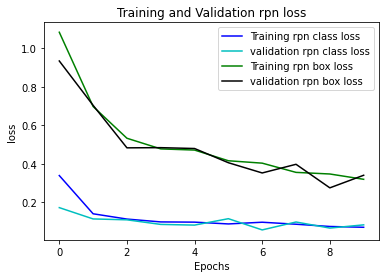

In [ ]:
train_rpn_class = history.history['rpn_class_loss']
train_rpn_bbox = history.history['rpn_bbox_loss']
val_rpn_class = history.history['val_rpn_class_loss']
val_rpn_bbox = history.history['val_rpn_bbox_loss']
epochs = range(0,10)
plt.plot(epochs, train_rpn_class, 'b', label='Training rpn class loss')
plt.plot(epochs, val_rpn_class, 'c', label='validation rpn class loss')
plt.plot(epochs, train_rpn_bbox, 'g', label='Training rpn box loss')
plt.plot(epochs, val_rpn_bbox, 'k', label='validation rpn box loss')
plt.title('Training and Validation rpn loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

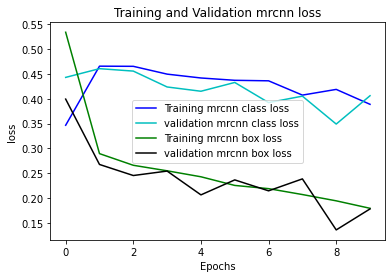

In [ ]:
train_mrcnn_class = history.history['mrcnn_class_loss']
train_mrcnn_bbox = history.history['mrcnn_bbox_loss']
val_mrcnn_class = history.history['val_mrcnn_class_loss']
val_mrcnn_bbox = history.history['val_mrcnn_bbox_loss']
epochs = range(0,10)
plt.plot(epochs, train_mrcnn_class, 'b', label='Training mrcnn class loss')
plt.plot(epochs, val_mrcnn_class, 'c', label='validation mrcnn class loss')
plt.plot(epochs, train_mrcnn_bbox, 'g', label='Training mrcnn box loss')
plt.plot(epochs, val_mrcnn_bbox, 'k', label='validation mrcnn box loss')
plt.title('Training and Validation mrcnn loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Saving model on drive

In [25]:
model_path = os.path.join("/content/drive/MyDrive/", "cpm17_basic_resnet101_final_35epoc.h5")
model.keras_model.save_weights(model_path)

Evaluation

In [50]:

class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join("/content/drive/MyDrive/", "cpm17_basic_resnet101_final_35epoc.h5")
#model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/MyDrive/cpm17_basic_resnet50.h5


Defining Evaluation metrics

In [32]:
#calculating Union
def compute_overlaps_masks(masks1, masks2):
  
    
    # If either set of masks is empty return empty result
    if masks1.shape[-1] == 0 or masks2.shape[-1] == 0:
        return np.zeros((masks1.shape[-1], masks2.shape[-1]))
    # flatten masks and compute their areas
    masks1 = np.reshape(masks1 > .5, (-1, masks1.shape[-1])).astype(np.float32)
    masks2 = np.reshape(masks2 > .5, (-1, masks2.shape[-1])).astype(np.float32)
    area1 = np.sum(masks1, axis=0)
    area2 = np.sum(masks2, axis=0)

    # intersections and union
    intersections = np.dot(masks1.T, masks2)
    union = area1[:, None] + area2[None, :] - intersections
    overlaps = intersections / union

    return overlaps


In [33]:
def phanotic_quality(iou):

  #summatiion of all ious>0.5
 TP=[(i> 0.5) for i in iou]
 sum_iou=np.sum(TP*iou)
  #calculating true positives
 true=np.count_nonzero(TP)
 #calculating true negatives
 TN=len(TP)-true
 return (sum_iou/(TN+true))

def segmentation_quality(iou):
  #calculating true positives
 TP=[(i> 0.5) for i in iou]
 sum_iou=np.sum(TP*iou)
 true=np.count_nonzero(TP)
 return (sum_iou/(true))
def dice_coef(y_real, y_pred, smooth=0):
      return (2 * (y_real*y_pred).sum() / (y_real+y_pred).sum()

In [34]:
def compute_dice(masks1, masks2):
    """Computes IoU overlaps between two sets of masks.
    masks1, masks2: [Height, Width, instances]
    """
    
    # If either set of masks is empty return empty result
    if masks1.shape[-1] == 0 or masks2.shape[-1] == 0:
        return np.zeros((masks1.shape[-1], masks2.shape[-1]))
    # flatten masks and compute their areas
    masks1 = np.reshape(masks1 > .5, (-1, masks1.shape[-1])).astype(np.float32)
    masks2 = np.reshape(masks2 > .5, (-1, masks2.shape[-1])).astype(np.float32)
    area1 = np.sum(masks1, axis=0)
    area2 = np.sum(masks2, axis=0)

    # intersections and union
    intersections = np.dot(masks1.T, masks2)
    union = area1[:, None] + area2[None, :]
    overlaps = 2*intersections / union

    return overlaps


In [56]:
dice_score=[]
n=0
computing dice over validation images by all the models saved while training
for i in sorted(os.listdir('/content/Mask_RCNN/logs/shapes20220612T0639')):
  if(n==20):
    break
  dice=[]
  print(i)
  mode_path="/content/Mask_RCNN/logs/shapes20220612T0639/"+str(i)
  model.load_weights(model_path, by_name=True)
  image_ids = np.random.choice(dataset_train.image_ids, 5)
  for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    dice.append(np.mean(np.max(compute_dice(gt_mask,r["masks"]),axis=1)))

  dice_score.append(np.mean(dice))
  n+=1
  



.ipynb_checkpoints
mask_rcnn_shapes_0001.h5
mask_rcnn_shapes_0002.h5
mask_rcnn_shapes_0003.h5
mask_rcnn_shapes_0004.h5
mask_rcnn_shapes_0005.h5
mask_rcnn_shapes_0006.h5
mask_rcnn_shapes_0007.h5
mask_rcnn_shapes_0008.h5
mask_rcnn_shapes_0009.h5
mask_rcnn_shapes_0010.h5
mask_rcnn_shapes_0011.h5
mask_rcnn_shapes_0012.h5
mask_rcnn_shapes_0013.h5
mask_rcnn_shapes_0014.h5
mask_rcnn_shapes_0015.h5
mask_rcnn_shapes_0016.h5
mask_rcnn_shapes_0017.h5
mask_rcnn_shapes_0018.h5
mask_rcnn_shapes_0019.h5


In [62]:
dice_score1=[]
n=0

for i in sorted(os.listdir('/content/Mask_RCNN/logs/shapes20220612T0639')):

  
  #computing dice over validation images by all the models saved while training
  if(n==20):
    break
  dice=[]
  print(i)
  mode_path="/content/Mask_RCNN/logs/shapes20220612T0639/"+str(i)
  model.load_weights(model_path, by_name=True)
  image_ids = np.random.choice(dataset_val.image_ids, 20)


  for image_id in image_ids:

    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)

    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]

    #computing dice score
    dice.append(np.mean(np.max(compute_dice(gt_mask,r["masks"]),axis=1)))
    
  dice_score1.append(np.mean(dice))
  n+=1
  



.ipynb_checkpoints
mask_rcnn_shapes_0001.h5
mask_rcnn_shapes_0002.h5
mask_rcnn_shapes_0003.h5
mask_rcnn_shapes_0004.h5
mask_rcnn_shapes_0005.h5
mask_rcnn_shapes_0006.h5
mask_rcnn_shapes_0007.h5
mask_rcnn_shapes_0008.h5
mask_rcnn_shapes_0009.h5
mask_rcnn_shapes_0010.h5
mask_rcnn_shapes_0011.h5
mask_rcnn_shapes_0012.h5
mask_rcnn_shapes_0013.h5
mask_rcnn_shapes_0014.h5
mask_rcnn_shapes_0015.h5
mask_rcnn_shapes_0016.h5
mask_rcnn_shapes_0017.h5
mask_rcnn_shapes_0018.h5
mask_rcnn_shapes_0019.h5


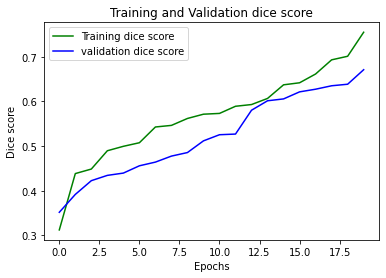

In [68]:
#dsiplaying dice score graph while training model
epochs = range(0,20)
plt.plot(epochs, dice_score, 'g', label='Training dice score')
plt.plot(epochs, dice_score1, 'b', label='validation dice score')
plt.title('Training and Validation dice score')
plt.xlabel('Epochs')
plt.ylabel('Dice score')
plt.legend()
plt.show()

# Quantitative Results

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 30 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 30)
APs = []
dice=[]
aji=[]
mean_iou=[]
pq=[]
sq=[]
over=[]
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    all_not_crowds = [False] * len(r["rois"])
    iou=compute_overlaps_masks(gt_mask,r["masks"])
    #computing iou
    iou=np.max(iou,axis=1)

    #computing phanotic quality
    p=phanotic_quality(iou)

    #computing segmentation quality
    s=segmentation_quality(iou)
    pq.append(p)
    sq.append(s)

    #computing dice score
    dice.append(np.mean(np.max(compute_dice(gt_mask,r["masks"]),axis=1)))
    mean_iou.append(np.mean(iou))
    
    #computing AP, precision,recall and overlaps
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    
    APs.append(AP)

# displaying evaluation metrics
print("segmentation quality: ",np.mean(sq))
print("penotic quality: ",np.mean(pq))
print("mIOU: ",np.mean(mean_iou))  
print("Dice: ",np.mean(dice)) 
print("mAP: ", np.mean(APs))


segmentation quality:  0.8209135747538647
penotic quality:  0.6801624303098813
mIOU:  0.68450356
Dice:  0.75117856
mAP:  0.8193243628926157


## Loading Test data

In [53]:

X_test = np.zeros((len(test_ids), config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1], 3), dtype=np.uint8)
sizes_test = []
_test_ids = []


#iterating over all test dataset to store all images to X_test
print('Getting and resizing test images ... ')
for n, id_ in enumerate(test_ids):
    print(id_)
    _test_ids.append([id_])
    path = TEST_PATH + id_

    #reading image
    img = imread("/content/cpm17/test/Images/" + id_ )[:,:,:3]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
    X_test[n] = img

Getting and resizing test images ... 
image_29.png
image_01.png
image_28.png
image_11.png
image_04.png
image_05.png
image_16.png
image_24.png
image_10.png
image_12.png
image_08.png
image_23.png
image_20.png
image_03.png
image_07.png
image_06.png
image_19.png
image_31.png
image_30.png
image_27.png
image_18.png
image_09.png
image_15.png
image_22.png
image_00.png
image_14.png
image_21.png
image_13.png
image_02.png
image_26.png
image_17.png
image_25.png


# Qualitative Results

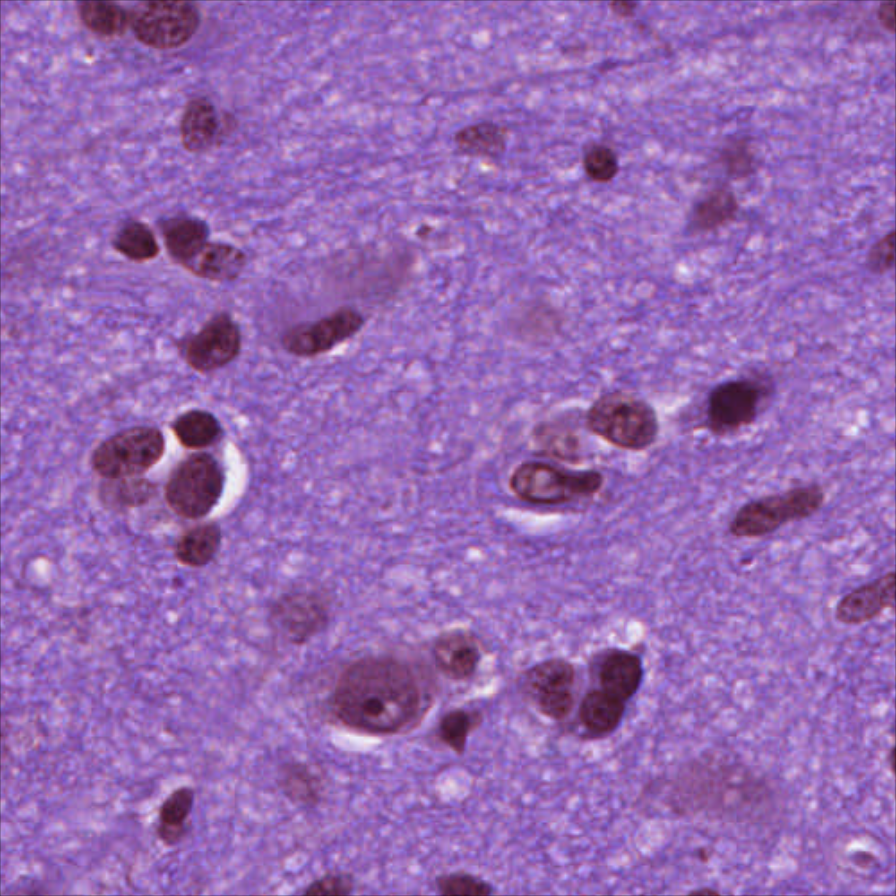

original_image           shape: (896, 896, 3)         min:   10.92683  max:  253.70928  float64
image_meta               shape: (14,)                 min:    0.00000  max:  896.00000  int64
gt_class_id              shape: (46,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (46, 4)               min:    1.00000  max:  895.00000  int32
gt_mask                  shape: (896, 896, 46)        min:    0.00000  max:    1.00000  float64
gt_mask                  shape: (896, 896, 46)        min:    0.00000  max:    1.00000  float64


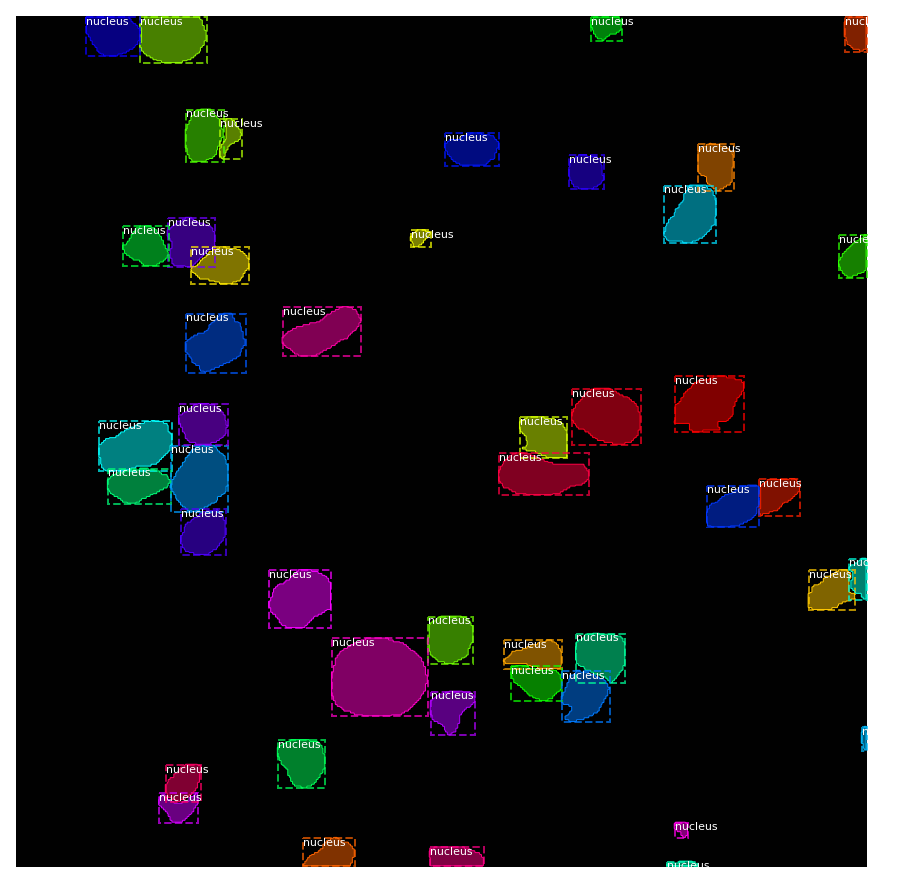

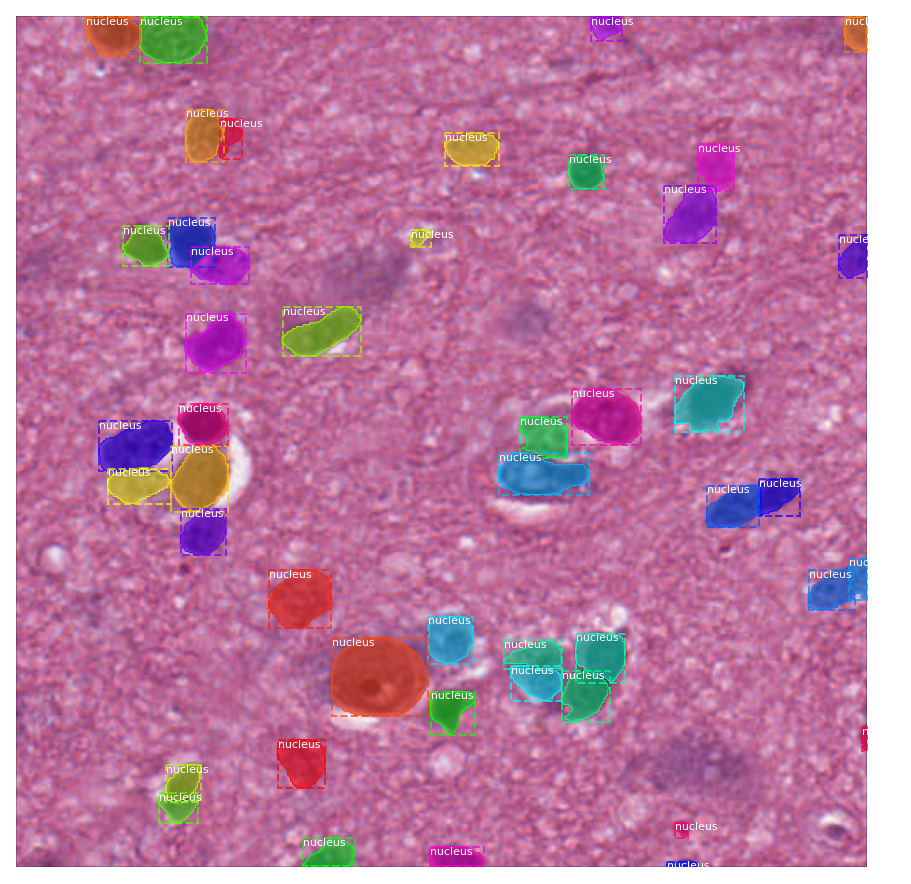

In [48]:
# Test on a random image
image_id = 18 #random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)
    
#displaying original image
cv2_imshow(original_image)

#preparing logs
log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
log("gt_mask", gt_mask)
img=np.ones((896,896,3))

#displaying ground truth mask
visualize.display_instances(img,boxes=gt_bbox, masks=gt_mask, class_ids=gt_class_id, 
                            class_names=dataset_train.class_names)

#displaying ground truth mask over original image
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names)

checking a test image with masks ...
Processing 1 images
image                    shape: (896, 896, 3)         min:   10.92683  max:  253.70928  float64
molded_images            shape: (1, 896, 896, 3)      min: -105.87317  max:  142.67812  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  896.00000  int64
anchors                  shape: (1, 200508, 4)        min:   -0.20226  max:    1.13075  float32


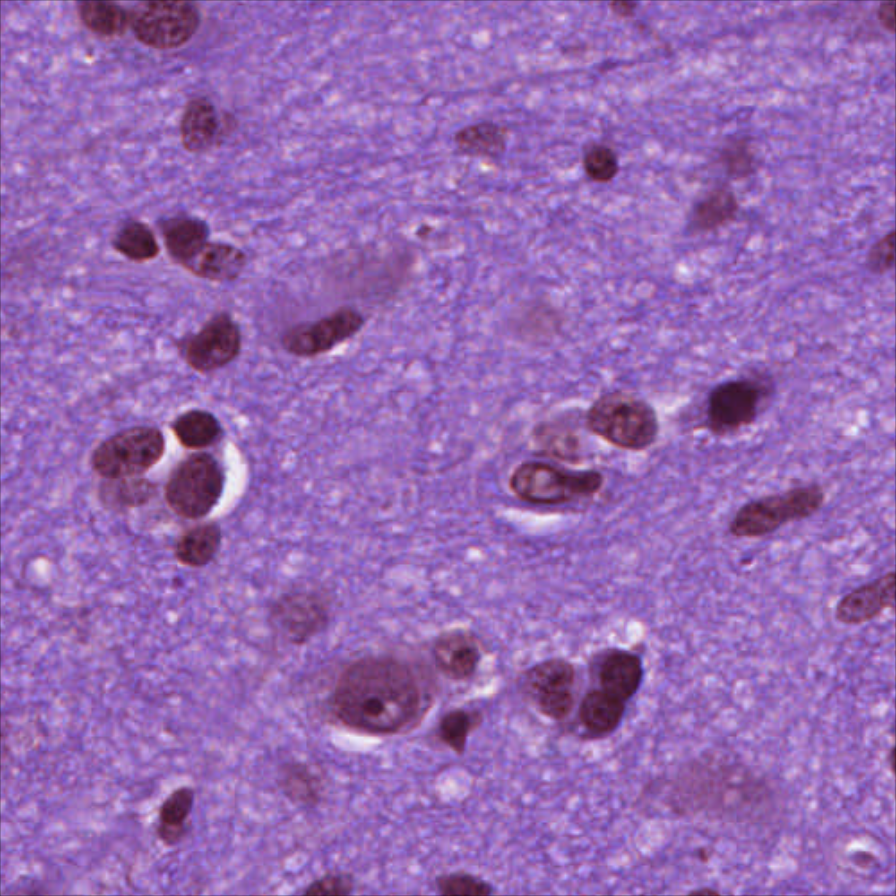

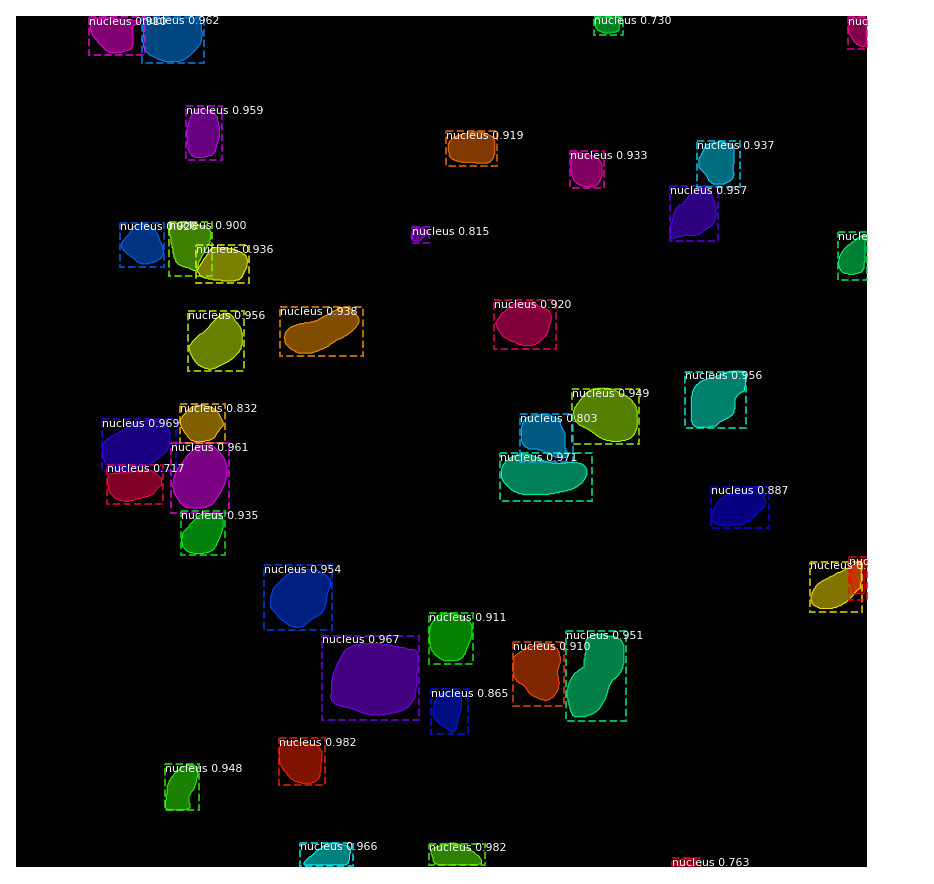

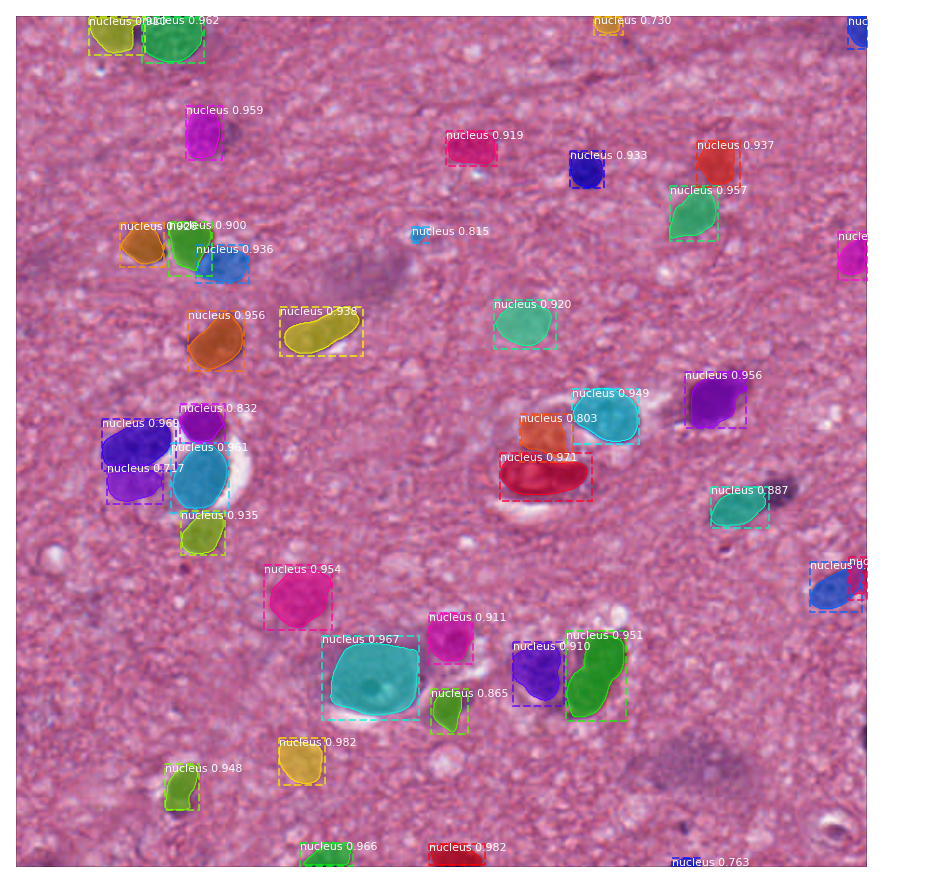

In [49]:
print("checking a test image with masks ...")
results = model.detect([original_image], verbose=1)

r = results[0]

#displaying original image
cv2_imshow(original_image)

#Black background for mask images
img=np.ones((896,896,3))

#displaying predicted mask
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

#displaying predicted mask superimposed over original image
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])
